# Praca domowa nr 8

In [1]:
import numpy as np
import pandas as pd
import warnings

In [2]:
df = pd.read_csv("rym_top5000.csv")
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Ranking,Album,Artist_Name,Release_Date,Genres,Descriptors,Average_Rating,Number_of_Ratings,Number_of_Reviews
0,1.0,OK Computer,Radiohead,16 June 1997,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531
1,2.0,Wish You Were Here,Pink Floyd,12 September 1975,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983
2,3.0,In the Court of the Crimson King,King Crimson,10 October 1969,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870
3,4.0,Kid A,Radiohead,3 October 2000,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734
4,5.0,To Pimp a Butterfly,Kendrick Lamar,15 March 2015,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379


In [3]:
for col in df.columns:
    print(col)

Ranking
Album
Artist_Name
Release_Date
Genres
Descriptors
Average_Rating
Number_of_Ratings
Number_of_Reviews


## Zadanie 1

### Jacy artyści z ponad 5 albumami na liście mają największą medianę ocen dla swoich albumów?  Podaj top 10.

In [4]:
artysci = df['Artist_Name'].value_counts().to_frame('count')
artysci['Artist_Name'] = artysci.index
artysci = artysci.query('count>5')
df1 = pd.merge(df, artysci,
            how = 'inner',
            on = 'Artist_Name') 
df1.groupby(by = 'Artist_Name').agg('Average_Rating').median().sort_values(ascending=False).head(10).to_frame()

,Average_Rating
Artist_Name,
David Bowie,4.050
The Beatles,4.045
King Crimson,3.970
The Rolling Stones,3.965
Black Sabbath,3.950
Led Zeppelin,3.940
Pink Floyd,3.910
Death,3.905
John Coltrane,3.905


### Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu?  Podaj top 10 oraz najwyższą i najniższą ocenę dla każdego z tych artystów.

In [5]:
#Jacy artyści mają największą różnicę między najgorszym i najlepszym średnim ratingiem dla swojego albumu? 
#Podaj top 10 oraz najwyższą i najniższą ocenę dla każdego z tych artystów.
df2 = df.groupby(by = 'Artist_Name')['Average_Rating'].describe()
df2['roznica'] = df2['max'] - df2['min']
c = df2.sort_values('roznica', ascending=False)[['roznica']].head(10)
c

,roznica
Artist_Name,
Kendrick Lamar,0.75
The Beatles,0.70
Pink Floyd,0.69
My Bloody Valentine,0.66
King Crimson,0.63
John Coltrane,0.60
Radiohead,0.57
Miles Davis,0.54
The Cure,0.54


### Podaj top 10 albumów o największym stosunku liczby ocen do liczby recenzji. Weź pod uwagę tylko albumy o przynajmniej 5000 ocenach i 15 recenzjach.


In [6]:
df['Number_of_Ratings2'] = df['Number_of_Ratings'].str.replace(',', '').astype(int)
df
df3 = df.query('`Number_of_Ratings2` >= 5000 and `Number_of_Reviews` >= 15' )
df3['wynik'] = df3['Number_of_Ratings2'].div(df3['Number_of_Reviews'].values)
df3.sort_values('wynik', ascending = False)['Album'].head(10)

<ipython-input-6-c4b63159f0bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['wynik'] = df3['Number_of_Ratings2'].div(df3['Number_of_Reviews'].values)


353     Jenny Death: The Powers That B Disc 2
1695                 Bury Me at Makeout Creek
3733                     春と修羅 (Haru to Shura)
4949                               Saturation
1036                           Saturation III
2489                                  Scenery
643                                   Endless
2869                                 Imperial
950                             Saturation II
439                            Bottomless Pit
Name: Album, dtype: object

### Z których lat pochodzi najwięcej albumów na liście najpopularniejszych wśród krytyków i najpopularniejszych wśród oceniających? a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl)

#### a) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę recenzji większą niż Q3 (trzeci kwartyl)

In [7]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

df['year'] = pd.DatetimeIndex(df['Release_Date']).year #wybieramy rok z daty wydania
df[['Number_of_Reviews','Number_of_Ratings2']].describe() #sprawdzamy kwantyle dla obu podpunktów
#Q3 - 75%            82.250000         4719.250000
df.query('`Number_of_Reviews` > 82.25').groupby(by = 'year')['year'].count().sort_values(ascending = False).head(5)

year
1970    43
1971    41
1969    38
1994    36
1995    34
Name: year, dtype: int64

#### b) Podaj 5 lat, w których wydano najwięcej albumów z listy mających liczbę ocen większą niż Q3 (trzeci kwartyl).

In [8]:
df4 = df.query('`Number_of_Ratings2` > 4719.25').groupby(by = 'year')['year'].count().sort_values(ascending = False).head(5)
df4

year
1994    41
1971    36
1970    35
1996    34
1995    33
Name: year, dtype: int64

## Zadanie 2 

In [9]:
import matplotlib
import matplotlib.pyplot as plt


In [10]:
df2 = df.groupby(by = 'Artist_Name')['Average_Rating'].describe()
df2['roznica'] = df2['max'] - df2['min']
d = df2.sort_values('roznica', ascending=False)[['mean']].head(10)
d = pd.DataFrame(d)
d = d.reset_index()

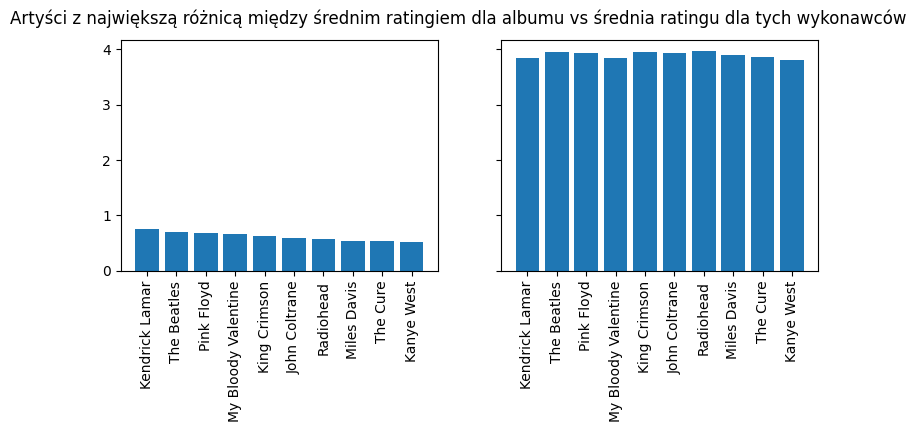

In [13]:
#del ax
c = c.reset_index()
d = d.reset_index()
fig, ax = plt.subplots(1,2,figsize=(9, 3), sharey=True)
ax[0].bar(c['Artist_Name'], c['roznica'],  label = 'Roznica ratingu')
ax[0].tick_params(axis='x', rotation=90)
ax[1].bar(d['Artist_Name'], d['mean'], label = 'srednie ratingu')
ax[1].tick_params(axis='x', rotation=90)

fig.suptitle('Artyści z największą różnicą między średnim ratingiem dla albumu vs średnia ratingu dla tych wykonawców\n\n')
plt.show() 

In [1]:
jupyter nbconvert --to html hw8.ipynb

<class 'SyntaxError'>: invalid syntax (<ipython-input-1-f7e66050beca>, line 1)